In [257]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [258]:
df = pd.read_csv('../raw_data/travel_insurance.csv')

In [259]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


##  summarise the data 

In [260]:
df.shape

(63326, 11)

In [261]:
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

In [262]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [264]:
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

In [265]:
df.drop(columns = 'Gender',inplace=True)

In [266]:
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Age'],
      dtype='object')

In [267]:
columns_odject = df.select_dtypes(include=['object']).columns.tolist()

for i in columns_odject:
    print('unique elements of',i,'are:')
    print(df[i].unique(),end='\n')
    print(end='\n')

unique elements of Agency are:
['CBH' 'CWT' 'JZI' 'KML' 'EPX' 'C2B' 'JWT' 'RAB' 'SSI' 'ART' 'CSR' 'CCR'
 'ADM' 'LWC' 'TTW' 'TST']

unique elements of Agency Type are:
['Travel Agency' 'Airlines']

unique elements of Distribution Channel are:
['Offline' 'Online']

unique elements of Product Name are:
['Comprehensive Plan' 'Rental Vehicle Excess Insurance' 'Value Plan'
 'Basic Plan' 'Premier Plan' '2 way Comprehensive Plan' 'Bronze Plan'
 'Silver Plan' 'Annual Silver Plan' 'Cancellation Plan'
 '1 way Comprehensive Plan' 'Ticket Protector' '24 Protect' 'Gold Plan'
 'Annual Gold Plan' 'Single Trip Travel Protect Silver'
 'Individual Comprehensive Plan' 'Spouse or Parents Comprehensive Plan'
 'Annual Travel Protect Silver' 'Single Trip Travel Protect Platinum'
 'Annual Travel Protect Gold' 'Single Trip Travel Protect Gold'
 'Annual Travel Protect Platinum' 'Child Comprehensive Plan'
 'Travel Cruise Protect' 'Travel Cruise Protect Family']

unique elements of Claim are:
['No' 'Yes']

unique 

In [268]:
df = df.drop_duplicates()

In [269]:
df.shape

(54656, 10)

In [270]:
df['Claim'] = df['Claim'].apply(lambda x: 1 if x == "Yes" else 0)

##  the most common ‘clusters’ of customers ; the ‘riskiest’ group of customers.

In [272]:
# top countries who makes claim

df_dest = df.groupby(by=['Destination']).agg({'Claim':'sum'}).sort_values(by='Claim',ascending=False)

In [273]:
df_dest.rename(columns={'Claim':'sum'},inplace=True)

In [274]:
df_dest.reset_index(inplace=True)

In [277]:
df_dest.sort_values(by='sum',ascending=False).head(15)

,Destination,sum
0,SINGAPORE,553
1,CHINA,46
2,AUSTRALIA,38
3,UNITED STATES,37
4,THAILAND,34
5,MALAYSIA,23
6,UNITED KINGDOM,16
7,"KOREA, REPUBLIC OF",15
8,HONG KONG,15
9,INDONESIA,15


In [278]:
df_dest['destnew'] = np.where(df_dest['sum']>8,df_dest['Destination'],'Others')

In [280]:
import plotly.express as px
fig = px.pie(df_dest,values='sum',names='destnew')
fig.show()

In [281]:
# relation between average age and claim

df.groupby(by='Age').agg({'Claim':'sum'}).sort_values(by='Claim',ascending=False).head(10)

,Claim
Age,
36,160
31,45
30,44
28,42
32,32
35,31
26,30
29,29
27,28


(array([   43.,  1716., 14163., 27133.,  7545.,  2846.,   579.,    63.,
            0.,   568.]),
 array([  0. ,  11.8,  23.6,  35.4,  47.2,  59. ,  70.8,  82.6,  94.4,
        106.2, 118. ]),
 <BarContainer object of 10 artists>)

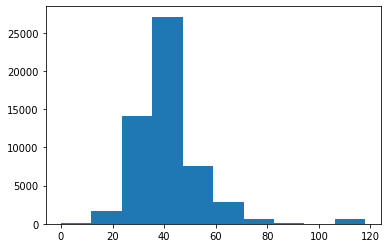

In [282]:
plt.hist(df['Age'])

In [251]:
# top product that make claim

df_product_claim = df[['Product Name','Claim','Commision (in value)']]
df_product_claim = df_product_claim.groupby(by='Product Name').agg({'Claim':'count','Commision (in value)':'mean'})
# df_product_claim
df_product_claim.sort_values(by='Claim',ascending=False).head()

,Claim,Commision (in value)
Product Name,,
Cancellation Plan,15308,0.000000
2 way Comprehensive Plan,11136,0.000000
Rental Vehicle Excess Insurance,8082,32.980156
Basic Plan,5071,9.665273
Bronze Plan,3620,8.988782


/Users/yanyi/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/yanyi/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Product Name', ylabel='Commision (in value)'>

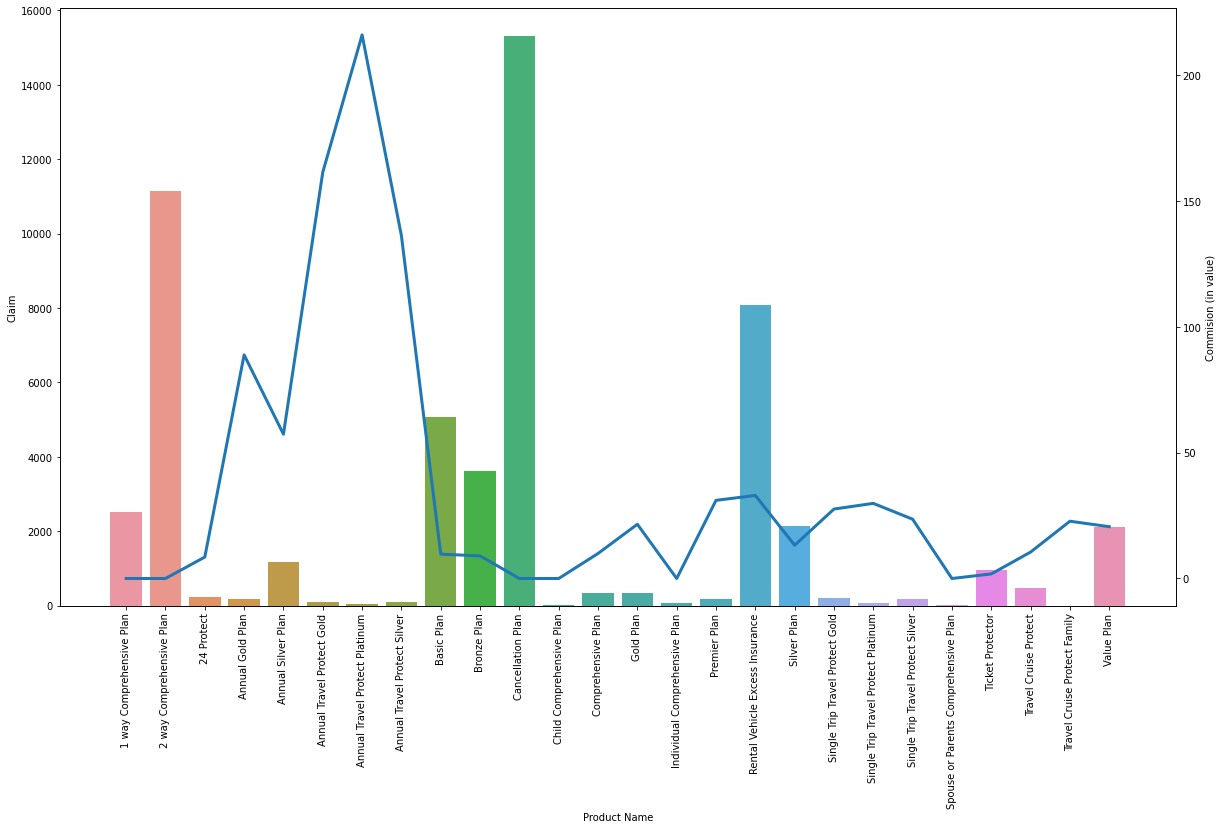

In [249]:
fig,ax1=plt.subplots(figsize=(20,11))
sns.barplot(df_product_claim.index,df_product_claim['Claim'],ax=ax1)
plt.xticks(rotation=90)
ax2=ax1.twinx()
sns.lineplot(df_product_claim.index,df_product_claim['Commision (in value)'],ax=ax2,linewidth=3)

In [255]:
# another way to show relation between destination and claim

df_destination = df[['Destination','Claim','Commision (in value)']]
df_destination = df.groupby(by='Destination').agg({'Claim':'count','Commision (in value)':'mean'})
df_destination_20 = df_destination.sort_values(by='Claim',ascending=False).head(20)
df_destination_20

,Claim,Commision (in value)
Destination,,
SINGAPORE,11225,13.881302
THAILAND,5082,5.878223
MALAYSIA,4354,7.543105
CHINA,3941,5.355506
AUSTRALIA,3455,26.349800
INDONESIA,2841,3.293706
UNITED STATES,2484,21.342484
HONG KONG,2099,3.362692
PHILIPPINES,2011,3.181377


/Users/yanyi/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/yanyi/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Destination', ylabel='Commision (in value)'>

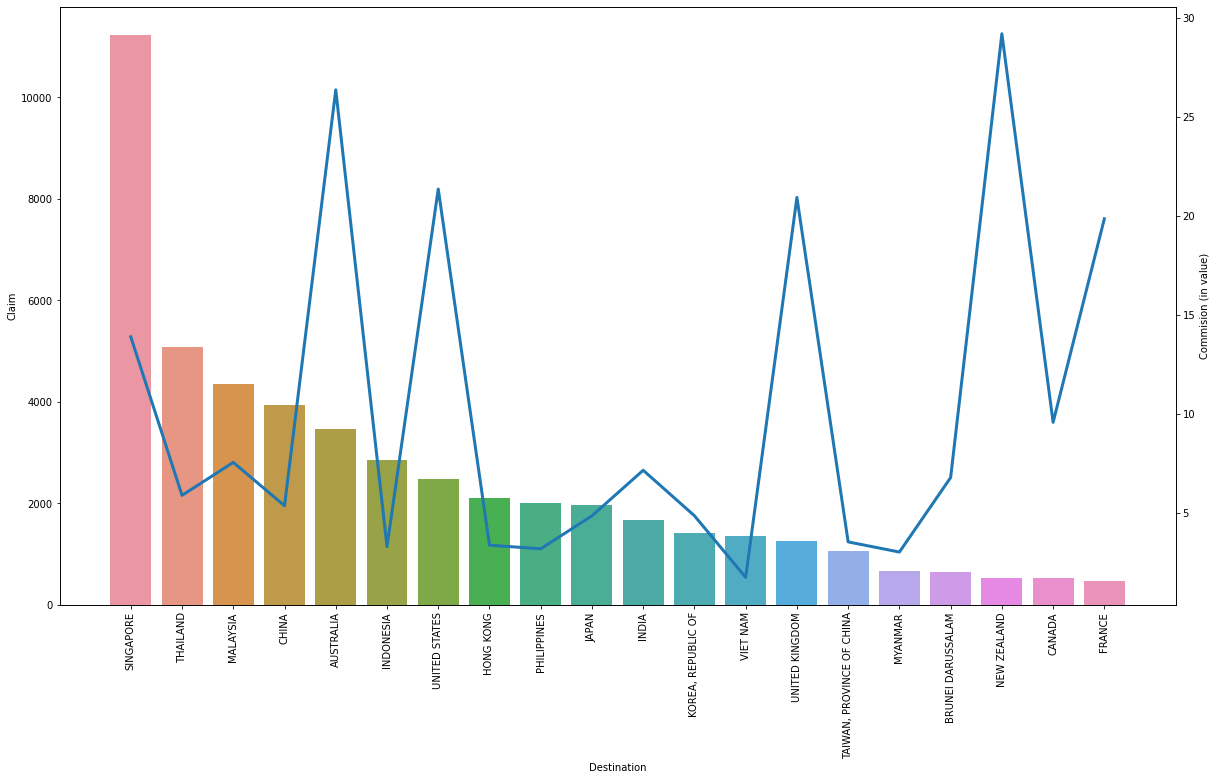

In [256]:
fig,ax1=plt.subplots(figsize=(20,11))
sns.barplot(df_destination_20.index,df_destination_20['Claim'],ax=ax1)
plt.xticks(rotation=90)
ax2=ax1.twinx()
sns.lineplot(df_destination_20.index,df_destination_20['Commision (in value)'],ax=ax2,linewidth=3)

## interesting facts about agency

In [287]:
# agency

df_agency = df.groupby(by='Agency').agg({'Claim':'sum','Commision (in value)':'mean'})

In [288]:
df_agency.rename(columns={'Claim':'sum'},inplace=True)

In [289]:
df_agency.reset_index(inplace=True)

/Users/yanyi/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/yanyi/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Agency', ylabel='Commision (in value)'>

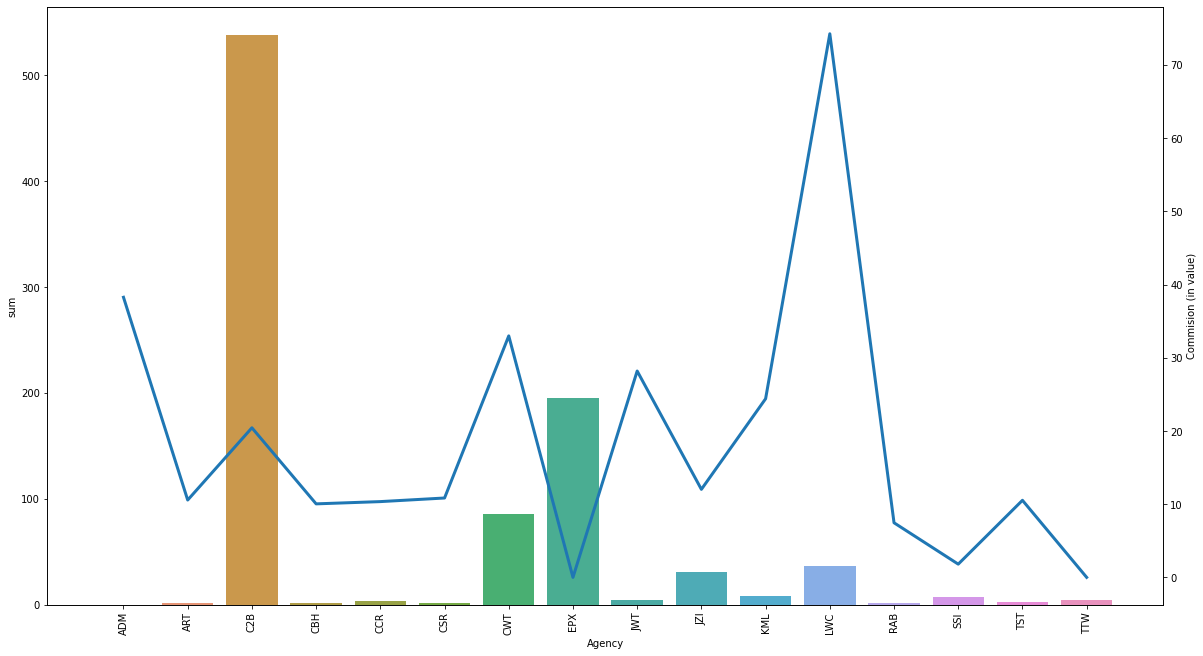

In [291]:
fig,ax1=plt.subplots(figsize=(20,11))
sns.barplot(df_agency['Agency'],df_agency['sum'],ax=ax1)
plt.xticks(rotation=90)
ax2=ax1.twinx()
sns.lineplot(df_agency['Agency'],df_agency['Commision (in value)'],ax=ax2,linewidth=3)

In [292]:
# another way to show relatio between product and claim

df_product = df.groupby(by='Product Name').agg({'Claim':'sum'})

In [293]:
df_product.rename(columns = {'Claim':'sum'},inplace=True)

In [294]:
df_product.reset_index(inplace=True)

In [295]:
fig = px.pie(df_product,values='sum',names='Product Name')
fig.show()

In [296]:
# commission

df_sales = df.groupby(by='Agency').agg({'Claim':'sum','Net Sales':'mean'})

In [297]:
df_sales.rename(columns={'Claim':'claim sum','Net Sales':'Average net sales'},inplace=True)

In [298]:
df_sales.reset_index(inplace=True)

/Users/yanyi/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/yanyi/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Agency', ylabel='Average net sales'>

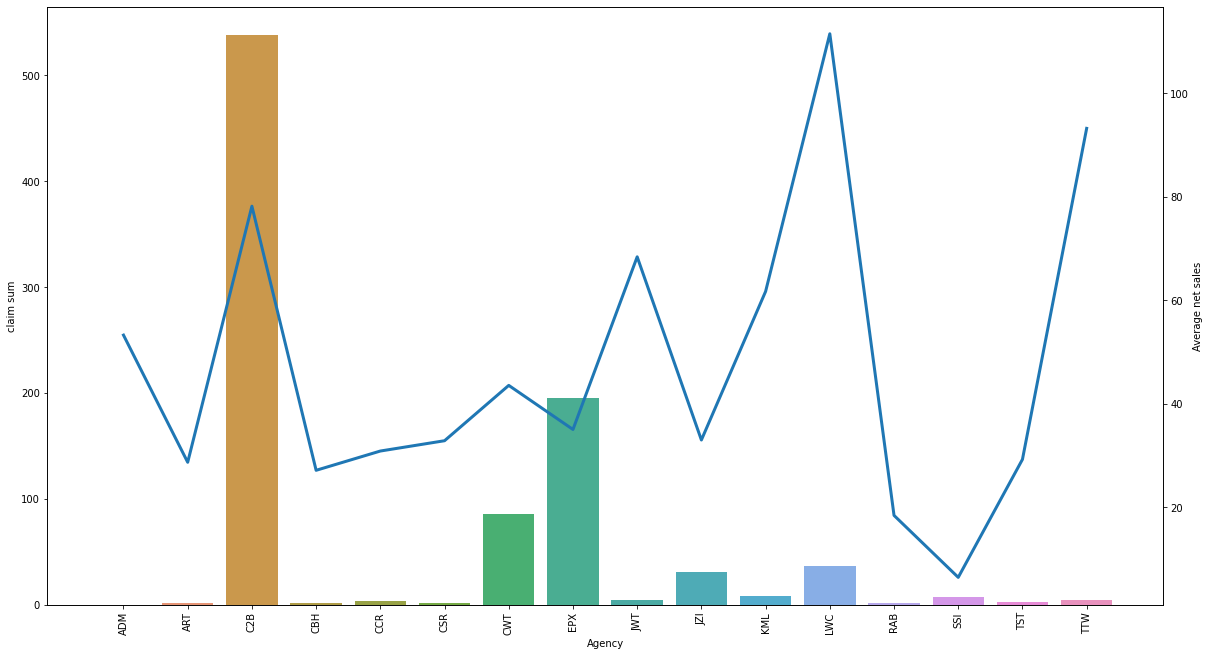

In [299]:
fig,ax1=plt.subplots(figsize=(20,11))
sns.barplot(df_sales['Agency'],df_sales['claim sum'],ax=ax1)
plt.xticks(rotation=90)
ax2=ax1.twinx()
sns.lineplot(df_sales['Agency'],df_sales['Average net sales'],ax=ax2,linewidth=3)

In [300]:
# distribution channel

df_channel = df.groupby(by='Distribution Channel').agg({'Claim':'sum'})

In [301]:
df_channel.rename(columns = {'Claim':'sum'},inplace=True)

In [302]:
df_channel.reset_index(inplace=True)

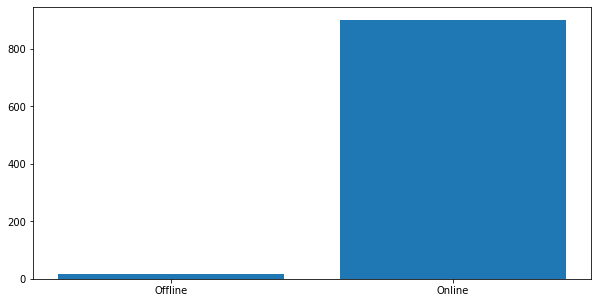

In [303]:
fig = plt.figure(figsize = (10, 5))
plt.bar(df_channel['Distribution Channel'],df_channel['sum'])
plt.show()

## feature scaling and encoding

In [161]:
# drop outliers
false_ = df['Duration'].argmin()
df = df.drop(false_).reset_index(drop=True)

In [162]:
# feature scale

from sklearn.preprocessing import StandardScaler

In [163]:
scaler = StandardScaler()

In [164]:
scaler.fit(df[['Duration']])
df['Duration'] = scaler.transform(df[['Duration']])

In [165]:
scaler.fit(df[['Net Sales']])
df['Net Sales'] = scaler.transform(df[['Net Sales']])

In [166]:
scaler.fit(df[['Commision (in value)']])
df['Commision (in value)'] = scaler.transform(df[['Commision (in value)']]) 

In [167]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [174]:
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Age'],
      dtype='object')

In [175]:
# feature encode

from sklearn import preprocessing
label_encoder1 = preprocessing.LabelEncoder()
df['Agency']= label_encoder1.fit_transform(df['Agency'])
  
label_encoder2 = preprocessing.LabelEncoder()
df['Agency Type']= label_encoder2.fit_transform(df['Agency Type'])

label_encoder3 = preprocessing.LabelEncoder()
df['Distribution Channel']= label_encoder3.fit_transform(df['Distribution Channel'])

label_encoder4 = preprocessing.LabelEncoder()
df['Product Name']= label_encoder4.fit_transform(df['Product Name'])

label_encoder5 = preprocessing.LabelEncoder()
df['Claim']= label_encoder5.fit_transform(df['Claim'])

label_encoder6 = preprocessing.LabelEncoder()
df['Destination']= label_encoder6.fit_transform(df['Destination'])

In [176]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,3,1,0,12,0,1.257852,79,-1.431021,-0.050397,3.115949
1,3,1,0,12,0,1.257852,79,-1.431021,-0.050397,2.358213
2,6,1,1,16,0,0.117554,4,-1.840692,0.923536,-0.596960
3,6,1,1,16,0,0.070434,4,-1.642851,0.636146,-0.596960
4,6,1,1,16,0,0.249489,61,-1.247169,0.061366,0.085003


<AxesSubplot:>

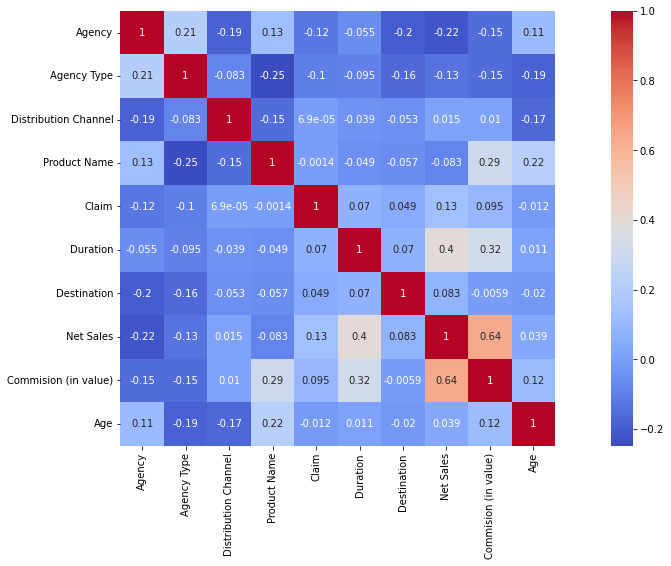

In [177]:
plt.figure(figsize = (20,8))
sns.heatmap(df.corr(), square=True,annot=True,cmap= 'coolwarm')

In [178]:
X = df.drop(columns = 'Claim')
y = df['Claim']

In [182]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [183]:
# classifier model

from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier()
model1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [186]:
model1.score(X_train,y_train)

0.9983794239113388

In [187]:
y_pred = model1.predict(X_test)

In [188]:
# get accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix

In [189]:
accuracy_score(y_test,y_pred)

0.9785326584131243

In [191]:
cm = confusion_matrix(y_test, y_pred)

In [193]:
cm

array([[16040,    82],
       [  270,     5]])

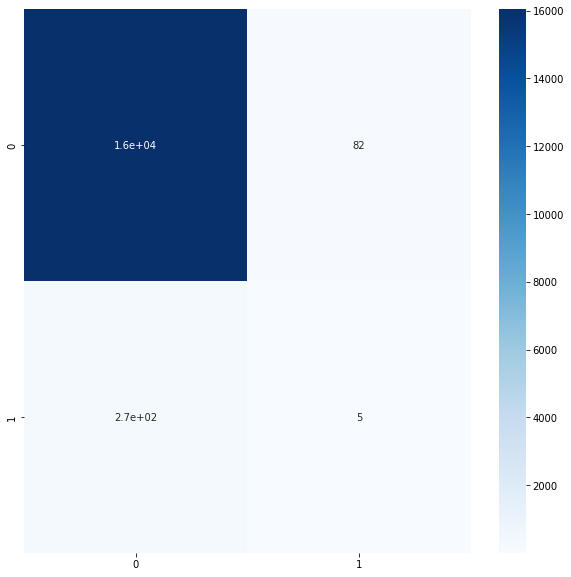

In [195]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap='Blues');